---

<p align="center">
  <img src="https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/images/imagen_ucentral.jpg" alt="logo_Ucentral" width="400px" height="300px">
</p>

# ___Diplomado: Métodos Estadísticos para el Análisis de Datos___

## ___Docente: Luis Andres Campos Maldonado.___

### ___Medidas estadísticas.___

- Medidas de tendencia central
- Medidas de dispersión.
- Medidas posicionales.

---

In [1]:
## Protocolo de módulos.
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import scipy.stats       as ss
import warnings
##
warnings.filterwarnings("ignore")

## ***Palabras claves:***

- **Media:** La suma de todos los valores dividida por el número de valores. También conocida como _promedio._

- **Media ponderada:** La suma de todos los valores multiplicada por un peso dividida por la suma de los pesos.

- **Mediana:** El valor tal que la mitad de los datos se encuentran por encima de dicho de valor, este representa el _percentil 50._

- **Percentil p:** El valor tal que el $p\%$ de los datos se encuentra debajo.

- **Media recortada:** El promedio de todos los valores después de descartar un número fijo de valores extremos.
También conocida como media truncada

- **Robusto:** No sensible a valores extremos.

- **Outlier:** Un valor de datos que es muy diferente de la mayoría de los datos. También conocido como valor atípico.

## ***Medidas de tendencia central.***

Las features con datos numéricos pueden tener miles de valores distintos. El paso básico para explorar estos datos es obtener un "valor típico" para cada feature, una estimación de dónde se encuentra la mayoría de los datos (es decir, su tendencia central).

Resumir datos puede parecer bastante trivial: simplemente tome la media de los datos. De hecho, mientras que la media es fácil de calcular y conveniente de usar, puede no ser siempre la mejor medida para un valor central. Por esta razón, los estadísticos han
desarrolló y promovió varias estimaciones alternativas a la media.

***Media o promedio***

La primera medida de tendencia central es la media ubicación es la media o valor promedio. La media es la
suma de todos los valores dividida por el número de valores. La media de una muestra se usa para representar la media de una población. La fórmula es:

$$\bar{x}=\sum_{i=1}^{n}\frac{x_i}{n}$$

donde los $x_{1}$ son los valores que toma la feature y $n$ es el tamaño de registros.


**Nota:** En estadística $N$ se refiere a una población y $n$ al tamaño de la muestra.

***Media recortada (trimmed mean):***

Una variación de la media es una media recortada, que se calcula dejando por fuera un número de valores ordenados en cada extremo y luego tomando un promedio de los valores restantes. Supongamos que $x_{(1)},x_{(2)},\cdots,x_{(n)}$ representan los datos ordenados, donde $x_{(1)}$ es el valor más pequeño y $x_{(n)}$ el mayor. La fórmula para la media recortada eliminado los $p$ valores más grandes y pequeños es:

$$\text{media recortada}=\sum_{i=p+1}^{n-p}\frac{x_i}{n-2p}$$

Esta medida elimina la influencia de los valores extremos. Por ejemplo, en competecias de clavados acuáticos, la puntuación más alta y la puntuación más baja de cinco jueces se descartan, y la puntuación final es el promedio de las puntuaciones de los tres jueces restantes. Esto hace dificil para un solo juez manipular la puntuación.

***Media ponderada:***

Esta medida se calcula multiplicando cada valor de datos $x_i$ por un peso especificado por el usuario $w_i$ y dividiendo su suma por la suma de los pesos:

$$\text{media ponderada}=\frac{\sum_{i=1}^{n}w_i*x_i}{\sum_{i=1}^{n}w_i}$$



Hay dos motivaciones principales para usar una media ponderada:

• Algunos valores son intrínsecamente más variables que otros y altamente variables. Considere por ejemplo, que estamos tomando el promedio de múltiples sensores y uno de los sensores es menos preciso, entonces podríamos reducir el peso de los datos de ese sensor.

• Los datos recogidos no representan por igual a los diferentes colectivos que estamos interesado en medir. Por ejemplo, por la forma en que un experimento en línea
se llevó a cabo, es posible que no tengamos un conjunto de datos que refleje con precisión todos los grupos en
la base de usuarios. Para corregir eso, podemos dar un mayor peso a los valores de los grupos que estaban subrepresentados.

***Mediana:***

La mediana es el número del medio en una lista ordenada de datos. Si hay un número par de valores de datos, el valor medio es uno que no está realmente en el conjunto de datos, para obtener esta, tomamos el promedio de los dos valores que están en la mitad de los datos. En comparación con la media, que utiliza todas las observaciones, la mediana depende solo en los valores en el centro de los datos ordenados. Si bien esto puede parecer una desventaja, ya que la media es mucho más sensible a los datos, hay muchos casos en que la mediana es una mejor métrica para la ubicación. 

Supongamos que deseamos conocer el ingreso medio de los hogares en su vecindario y compararlos con el de su vecindario vecino. Al comparar usando la media se obtendrían resultados muy distintos pues un su vecindario vive Bill Gates. Ahora, al usar la **mediana**, no importa cuán rico sea Bill Gates: la posición de la observación central seguirá siendo el mismo.

## ***Ejemplo 1.***

Consideremos el dataset:

In [2]:
url_base = 'https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/'
name_data = 'state.csv'
df = pd.read_csv(url_base+name_data,)
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


Este dataset contienen la población y la tasa de asesinatos (en unidades de asesinatos por cada 100.000 personas por año) para cada estado de EE.UU (Censo 2010).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [4]:
## Calculo de la media, trim mean and median de la feature population.
mean = df['Population'].mean()
trim_mean = ss.trim_mean(df['Population'], 0.1)
median = df['Population'].median()
##
print('La media de la feature {} es: {:.2f}'.format('Population',mean))
print(f'La media recortada de la feature Population es: {trim_mean:.2f}')
print('La mediana de la feature Population es:', median)

La media de la feature Population es: 6162876.30
La media recortada de la feature Population es: 4783697.12
La mediana de la feature Population es: 4436369.5


Note que la media es mayor que la media recortada, y a su vez esta es mayor que la mediana. Esto se debe a que la media recortada excluye los cinco estados más grande y más pequeño (trim = 0,1, 10% de cada extremo). Si queremos calcular la tasa promedio de asesinatos para el país, necesitamos usar una media o mediana ponderada para dar cuenta de diferentes poblaciones en los estados.

La media ponderada está disponible con NumPy.

In [5]:
df["Murder.Rate"].mean()

4.066

In [6]:
np.average(df["Murder.Rate"], weights=df["Population"])

4.445833981123393

***Notas importantes:***

• La métrica básica para la ubicación es la media, pero puede ser sensible a los extremos valores (valores atípicos).

• Otras métricas (mediana, media recortada) son menos sensibles a valores atípicos e inusuales y por lo tanto son más robustos.

## ***Ejemplo 2.***

Vamos a considerar el dataframe [`iris`](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [7]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Unas primeras inspecciones de los datos:

In [8]:
## Tipos de variables.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
## Valores únicos
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [11]:
## Descripción general del dataset
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [12]:
## Describción de las variables tipo 'object'
iris.describe(include=['O']).T

,count,unique,top,freq
species,150,3,setosa,50


Vamos a calcular las medias de todas la features

In [13]:
iris.mean().sort_values()

petal_width     1.199333
sepal_width     3.057333
petal_length    3.758000
sepal_length    5.843333
dtype: float64

#### ***Ejercicio 1.***

Genere un barplot plot con las medias en el eje $y$ y los nombres de las variables en el $x$.

***Respuesta:***

In [14]:
iris.mean().index

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [15]:
## Celda de código para probar
fig = px.bar(x=iris.mean().index,                       ## Valores en x.
             y=iris.mean(),                             ## Valores en y.
             title='Barplot medias: dataset iris',      ## Título.
             labels={'x':'feature','y':'media'},        ## Etiquetas hover data.
             color_discrete_sequence=['pink'],          ## Color
             )          
fig.update_xaxes(title='Caracteristicas',                 ## Nombre en el eje x.
                 categoryorder='array', 
                 categoryarray= ['petal_width', 'sepal_length', 'petal_length','sepal_width'])
fig.show()

In [16]:
## Calculo de la mediana.
iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

## ***Outliers***

La mediana se conoce como una estimación robusta de la ubicación ya que no está influenciada por outliers (valores atípicos) que podrían sesgar los resultados. Un valor atípico es cualquier valor que es muy distante de los otros valores en un conjunto de datos. La definición exacta de un valor atípico es algo subjetivo, aunque ciertas convenciones se utilizan en varios resúmenes de datos y gráficas. Ser un outlier en sí mismo no hace que un valor de datos sea inválido o erróneo (piense en Bill). Aun así, los valores atípicos suelen ser el resultado de errores de datos, como mezclar datos de diferentes unidades (kilómetros versus metros) o malas lecturas de un sensor. Cuando los valores atípicos están
como resultado de datos erróneos, la media dará como resultado una mala estimación de la ubicación, mientras que la mediana seguirá siendo válida. En cualquier caso, los valores atípicos deben identificarse y generalmente ser dignos de mayor investigación.

**Nota:** 

En contraste con el análisis de datos típico, donde los valores atípicos a veces son informativo y, a veces, una molestia, en la detección de anomalías un punto de interés son los valores atípicos, y la mayor masa de datos sirve principalmente para definir lo "normal" contra lo cual las anomalías se miden.

La mediana no es la única estimación robusta de posición. De hecho, una media recortada es
ampliamente utilizada para evitar la influencia de valores atípicos. Por ejemplo, recortar la parte inferior y superior 10%  (una elección común) de los datos proporcionará protección contra valores atípicos.

## ***Medidas de dispersión.***

La ubicación es solo una dimensión al resumir una feature. Una segunda dimensión es la variabilidad, también conocida como dispersión, ya que mide si los valores de los datos están muy agrupados o dispersos. Una idea importante de la estadística se centra en la variabilidad: medirla, reducirla, distinguir la variabilidad aleatoria de la real, identificando las diversas fuentes de variabilidad y tomar decisiones en presencia de ella.



### ***Palabras claves:***

**Desviaciones:** La diferencia entre los valores observados y la estimación de ubicación.

**Varianza:** La suma de las desviaciones al cuadrado de la media dividida por $n–1$ donde $n$ es el número de datos. (mean-squared-error)

**Desviación Estándar:** La raíz cuadrada de la varianza.

**Desviación media absoluta:** La media de los valores absolutos de las desviaciones de la media. (l1, norma de Manhattan)

**Rango:** La diferencia entre el valor más grande y el más pequeño en un conjunto de datos.

**Estadística de orden:** Métricas basadas en los valores de datos ordenados de menor a mayor.

**Percentil p:** El valor tal que el $p\%$ de los datos toman este valor o menos y $(100–P)\%$ restante toma este valor o más.

**Rango intercuartil (IQR):** La diferencia entre el percentil 75 y el percentil 25.


## ***Desviación estándar y estimaciones relacionadas***

Las estimaciones de variación más utilizadas se basan en las diferencias, o desviaciones, entre la estimación de la ubicación y los datos observados. Estas desviaciones nos dicen qué tan dispersas están los datos alrededor del valor central.

$$\text{medida1 = }\frac{\sum_{i=1}^{n}(x_i-\bar{x})}{n}=0$$

***Desviación absoluta media (MAD)***

Una forma de medir la variabilidad es estimar un valor típico para estas desviaciones. Promediar las desviaciones en sí mismas no nos diría mucho: las desviaciones negativas compensar los positivos. De hecho, la suma de las desviaciones de la media es precisamente cero. En su lugar, un enfoque simple es tomar el promedio de los valores absolutos:

$$\text{MAD = }\frac{\sum_{i=1}^{n}|x_i-\bar{x}|}{n}$$

***Varianza y desviación estándar***

Las estimaciones de variabilidad más conocidas son la varianza y la desviación estándar, que se basan en desviaciones al cuadrado. La varianza es un promedio del cuadrado de las desviaciones, y la desviación estándar es la raíz cuadrada de la varianza:

$$\text{Varianza = }s^{2}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})^{2}}{n-1}$$

$$\text{Desviacion estandar = }s=\sqrt{Varianza}=\sqrt{\frac{\sum_{i=1}^{n}(x_i-\bar{x})^{2}}{n-1}}$$

La desviación estándar es mucho más fácil de interpretar que la varianza ya que está en el misma escala que los datos originales. Aún así, con su fórmula más complicada y menos intuitiva, puede parecer peculiar que la desviación estándar sea preferida en estadística sobre
la desviación media absoluta, esto se debe a la teoría estadística: matemáticamente, trabajar con valores al cuadrado es mucho más conveniente que con valores absolutos.

***Nota:***

En los libros de estadística, siempre hay alguna discusión sobre por qué tenemos $n–1$ en el
denominador en la fórmula de la varianza, en lugar de $n$, lo que lleva al concepto de grados de libertad. Esta distinción no es importante ya que $n$ es generalmente lo suficientemente grande como para que se presente mucha diferencia si se divide por $n$ o $n–1$. La historia se basa en la premisa de que desea realizar estimaciones sobre una población, en función de una muestra.
Si usa el denominador intuitivo de $n$ en la fórmula de la varianza, subestimará el verdadero valor de la varianza y la desviación estándar en la población. Esto
se conoce como una estimación sesgada. Sin embargo, si divide por $n–1$ en lugar de $n$, la varianza se convierte en una estimación insesgada.

Como usar $n$ conduce a una estimación sesgada  se involucra la noción de grados de libertad, que tiene en cuenta el número de restricciones al calcular una estimación. En este caso, hay $n–1$ grados de libertad ya que hay una restricción: la desviación estándar depende del cálculo de la media muestral.

## ***Estimaciones basadas en percentiles.***

Un enfoque diferente para estimar la dispersión se basa en observar la dispersión de los datos ordenados. Las estadísticas basadas en datos ordenados se denominan estadísticas de orden. La medida más básica es el rango: la diferencia entre el mayor y el menor números. Los valores mínimo y máximo en sí son útiles para conocer y son útil para identificar valores atípicos, pero el rango es extremadamente sensible a los valores atípicos y no muy útil como medida general de dispersión en los datos. Para evitar la sensibilidad a los valores atípicos, podemos observar el rango de los datos después de descartar valores de cada extremo. Formalmente, este tipo de estimaciones se basan en diferencias entre percentiles. En un conjunto de datos, el percentil $p$ es un valor tal que al menos el $p\%$  de los valores toman este valor o menos y al menos $(100–P)\%$ de los valores son mayores. Como ejemplo, para encontrar el percentil 80, se ordenan, luego, comenzando con el valor más pequeño, se avanza el $80\%$ por ciento del camino hasta el valor más grande valor. Note que la **mediana** es el percentil 50.

***Rango intercuartílico: (IQR)***

Una medida común de la variabilidad es la diferencia entre el percentil 25 y el percentil 75, llamado rango intercuartil. 

***Percentil: definición precisa***

Si tenemos un número par de datos (n es par), entonces el percentil es ambiguo bajo la definición anterior. De hecho, podríamos tomar en cualquier valor entre las estadísticas de orden $x_{(j)}$ y $x_{(j+ 1)}$ donde $j$
satisface:

$$100*\frac{j}{n}\leq P < 100*\frac{j+1}{n}$$

Formalmente, el percentil es el promedio ponderado:

$$Percentil(P)=(1−w)x_{(j)} + wx_{(j+1)}$$

para algún peso $w$ entre 0 y 1. 

A excepción de pequeños conjuntos de datos, por lo general no necesitamos preocuparnos por la forma precisa en que se calcula un percentil.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [18]:
### Cálculo desviación estandar, rango intercualtílico.
print(df['Population'].std())
print(df['Population'].quantile(0.75) - df['Population'].quantile(0.25))

6848235.347401142
4847308.0


***Comentarios:***

• La varianza y la desviación estándar son las más extendidas y reportadas de forma rutinaria en estadísticas de variabilidad.

• Ambos son sensibles a los valores atípicos.

• Las métricas más robustas incluyen la desviación absoluta media y percentiles.

# ***Explorando la distribución de datos.***

Las estimaciones que hemos mostardo resume los datos en un solo número para describir la ubicación o la variabilidad de los datos. También es útil explorar cómo se distribuyen los datos en general.

***Palabras claves:***

- **Box-plot (Diagrama de caja y bigotes):**  Un gráfico introducido por Tukey como una forma rápida de visualizar la distribución de datos.

- **Tabla de frecuencias:** Un recuento de los valores de datos numéricos que caen en un conjunto de intervalos (bins).

- **Histograma:** Una gráfica de la tabla de frecuencias con los contenedores en el eje $x$ y el conteo (o proporción) en el eje $y$. Aunque visualmente similares, los gráficos de barras no deben confundirse
con histogramas. 

- **Density plot:** Una versión suavizada del histograma, a menudo basada en una estimación de la densidad del kernel.

### ***Percentiles y Boxplots.***

Los percentiles sirven para medir la dispersión de los datos. Los percentiles también son valiosos para resumir
toda la distribución. Es común reportar los cuartiles (percentiles 25, 50 y 75) y los deciles (percentiles 10, 20,…, 90). Los percentiles son especialmente valiosos para resumir las colas de la distribución. Popularmente
se ha acuñado el término uno por ciento para referirse a las personas en el percentil 99 superior de riqueza.

In [19]:
df['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95,0.99])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
0.99    9.467
Name: Murder.Rate, dtype: float64

La mediana es de 4 asesinatos por cada 100.000 habitantes, aunque hay bastante variabilidad:
el percentil 5 es solo $1,6$ y el percentil 95 es $6,51$.

Los boxplots se basan en percentiles y dan una
manera rápida de visualizar la distribución de datos.

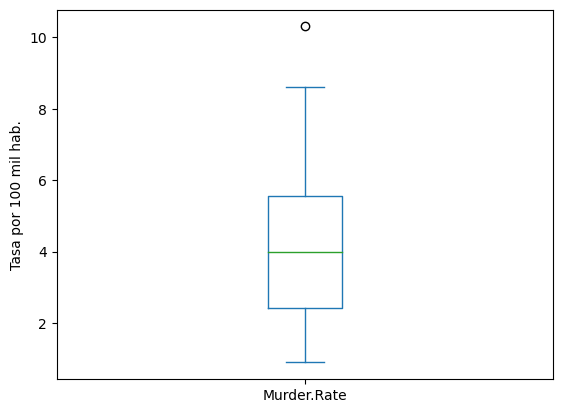

In [20]:
## Una primera opción de plot.
ax = (df['Murder.Rate']).plot.box()
ax.set_ylabel('Tasa por 100 mil hab.')
plt.show()

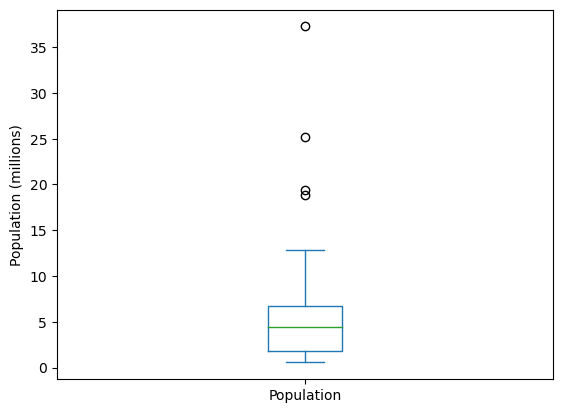

In [21]:
## Una primera opción de plot.
ax = (df['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)');

In [22]:
df.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [23]:
fig = px.box(df, x='Population', hover_data=['State',], title='Box-plot')
fig.update_layout(xaxis_title='Población (millones)',)
fig.show()

La parte superior e inferior de la caja son respectivamente el percentil 75 y el 25. La mediana se muestra con la línea horizontal dentro de la caja. Lo que se extiende arriba y abajo de la caja se conocen como bigotes, se extienden desde la parte superior e inferior de la caja hasta indicar el rango para la mayor parte de los datos. Estos gigotes no irá más allá de 1,5 veces el IQR. Cualquier dato fuera de los bigotes se traza como puntos únicos o círculos (a menudo considerados atípicos).

A partir de este diagrama de caja, podemos ver de inmediato que la población estatal que la mediana es de aproximadamente 5 millones, la mitad de los estados se encuentran entre alrededor de 2 millones y 7 millones, y hay algunos valores atípicos de alta población.  

### ***Tablas de frecuencia e histogramas.***
Una tabla de frecuencia de una variable divide el rango de la variable en segmentos igualmente espaciados y nos dice cuántos valores caen dentro de cada segmento.

In [24]:
df['Population'].describe()

count    5.000000e+01
mean     6.162876e+06
std      6.848235e+06
min      5.636260e+05
25%      1.833004e+06
50%      4.436370e+06
75%      6.680312e+06
max      3.725396e+07
Name: Population, dtype: float64

In [25]:
cut_Population = pd.cut(df['Population'], right = False, bins = 10)
cut_Population.value_counts()

[563626.0, 4232659.0)        24
[4232659.0, 7901692.0)       14
[7901692.0, 11570725.0)       6
[11570725.0, 15239758.0)      2
[15239758.0, 18908791.0)      1
[18908791.0, 22577824.0)      1
[22577824.0, 26246857.0)      1
[33584923.0, 37290646.33)     1
[26246857.0, 29915890.0)      0
[29915890.0, 33584923.0)      0
Name: Population, dtype: int64

#### ***Ejercicio 2.***

Determine cual es el estado menos poblado y el más poblado. ¿De qué tamaño son los bins?

In [26]:
df.iloc[df['Population'].idxmax()].to_frame(name='max_population').T

,State,Population,Murder.Rate,Abbreviation
max_population,California,37253956,4.4,CA


In [27]:
## Celda de código para probar.
## Celda de código para probar.
df1 = df.iloc[df['Population'].idxmax()].to_frame(name='max_population').T
df2 = df.iloc[df['Population'].idxmin()].to_frame(name = 'min_population').T
pd.concat([df1, df2], axis=0,)

,State,Population,Murder.Rate,Abbreviation
max_population,California,37253956,4.4,CA
min_population,Wyoming,563626,2.7,WY


El estado menos poblado es Wyoming, con 563.626 personas, y el más poblado es
California, con 37.253.956 personas. Esto nos da un rango de 37,253,956 – 563,626 =
36,690,330, que debemos dividir en bins de igual tamaño, digamos 10 bins. con 10
bins de igual tamaño, cada contenedor tendrá un ancho de 3,669,033, por lo que el primer contenedor abarcará desde
563.626 a 4.232.658. Por el contrario, el contenedor superior, 33 584 923 a 37 253 956, solo tiene una
estado: California. Los dos bins inmediatamente debajo de California están vacíos, hasta que llegar a Texas. Es importante incluir los bins vacíos; el hecho de que no hay valores en esos bins hay información útil. También puede ser útil experimentar con diferentes
tamaños de bins. Si son demasiado grandes, las características importantes de la distribución pueden oscurecerse. Si son demasiado pequeños, el resultado es demasiado granular y la capacidad de ver el panorama general está perdido.

**Nota**

Tanto las tablas de frecuencia como los percentiles resumen los datos mediante la creación de intervalos. En general, los cuartiles y los deciles tendrán el mismo conteo en cada bins (bins de igual conteo), pero los tamaños de los bins serán diferentes.La tabla de frecuencia, por el contrario, tendrá diferentes recuentos en los bins (bins del mismo tamaño) y los tamaños de los bins serán los mismos.

***Histograma***

Recordemos que un histograma es una forma de visualizar una tabla de frecuencias, con intervalos en el eje $x$ y el recuento de datos en el eje $y$.

Text(0.5, 0, 'Population (millions)')

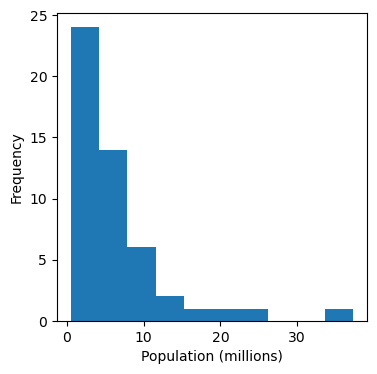

In [28]:
ax = (df['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

### ***Gráficas y estimaciones de densidad.***

Relacionado con el histograma hay un gráfico de densidad, que muestra la distribución de valores de datos
como una línea continua. Un gráfico de densidad se puede considerar como un histograma suavizado, aunque normalmente se calcula directamente a partir de los datos a través de una estimación de la densidad del kernel

***Palabras claves:***

• ***Histograma:*** Traza los recuentos de frecuencia en el eje $y$ y los valores de las variables
en el eje $x$; da una idea de la distribución de los datos de un vistazo.

• ***Tabla de frecuencia:*** Es una versión tabular de los recuentos de frecuencia que se encuentran en un
histograma.

• ***Box-plot:*** También da una idea rápida de la distribución de los datos; es a menudo se utiliza en pantallas de lado a lado para comparar distribuciones.

• ***Density plot:*** Es una versión suavizada de un histograma; requiere una función para estimar un gráfico basado en los datos (por supuesto, son posibles múltiples estimaciones).

Text(0.5, 0, 'Murder Rate (per 100,000)')

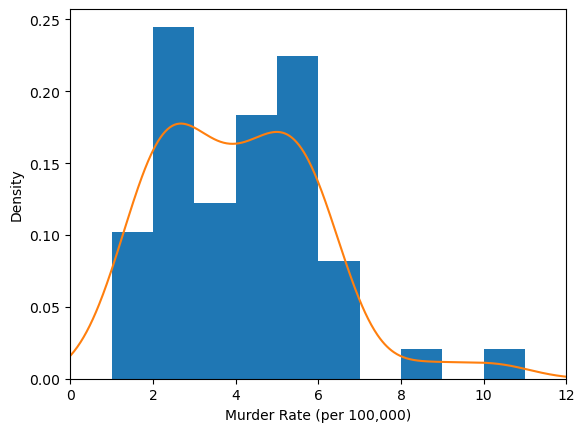

In [29]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

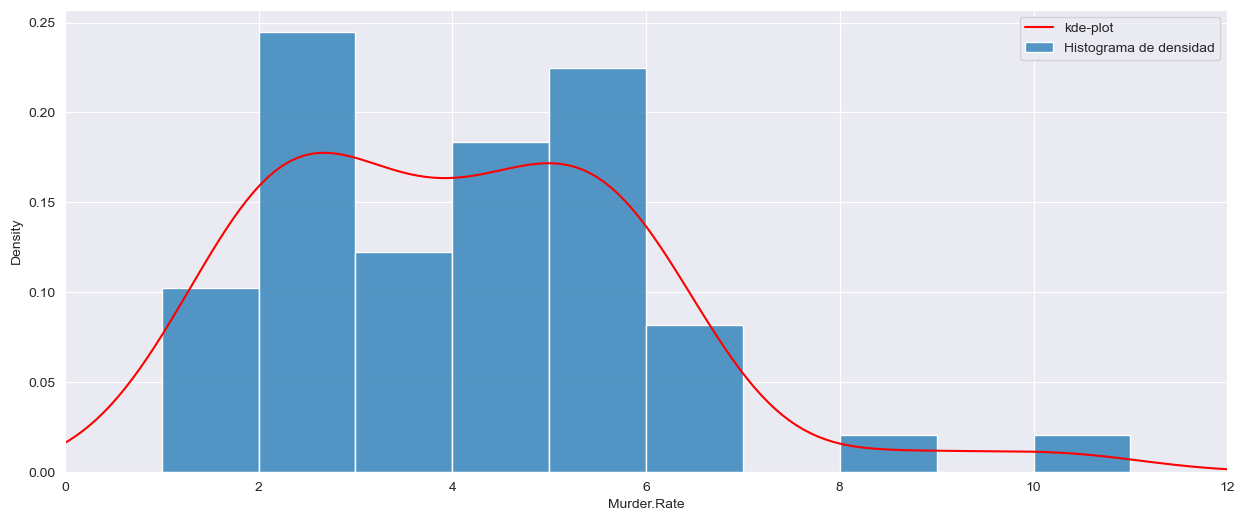

In [30]:
## Un mejor plot.
sns.set_style('darkgrid')   ## Estilo de los plots.
plt.figure(figsize=(15,6))  ## Tamaño al plot
sns.histplot(data=df, x='Murder.Rate', 
             stat='density',
             bins=range(1,12), 
             label = 'Histograma de densidad')
sns.kdeplot(data = df, x = 'Murder.Rate', color = 'red', label = 'kde-plot')
plt.xlim([0,12])
plt.legend()
plt.show()

## ***Ejemplo 3.***

Vamos a presentar algunos cálculo con el dataset `iris`.

In [31]:
def mad(serie):
  """
      Esta función calcula el valor: media absolute desviation (mad).
      Input: Serie de pandas.
      Output: mad de la serie de pandas.
  """
  mad = abs(serie - serie.mean()).mean()
  return mad

In [32]:
mad(iris['sepal_length'])

0.6875555555555557

In [33]:
iris.select_dtypes(np.number)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
iris.select_dtypes(np.number).apply(mad).to_frame(name='mad').T

,sepal_length,sepal_width,petal_length,petal_width
mad,0.687556,0.336782,1.562747,0.658133
